# Cгенерировать одномерную выборку: единственный признак – это равномерная на отрезке [0,1] выборка, значение целевой переменной генерируются по формуле: $y = cos(\frac{3}{2}\pi x)+N(0,001)$

# Необходимо рассмотреть три модели:
- Линейная модель над признаком {x}
- Линейная модель над признаками {$x, x^2, x^3, x^4$}
- Линейная модель над признаком {$x, x^2, ..., x^{15}$}


Модель степени 1
Коэффициенты: [-1.535341]
Свободный член: [0.693624]
Train MSE: 0.184482, Test MSE: 0.166861
Train R²: 0.5295, Test R²: 0.7563

Модель степени 4
Коэффициенты: [  3.451276 -29.289114  40.3442   -15.255605]
Свободный член: [0.789804]
Train MSE: 0.016510, Test MSE: 0.013263
Train R²: 0.9579, Test R²: 0.9806

Модель степени 15
Коэффициенты: [ 1.65591213e+02 -8.14884623e+03  1.92186645e+05 -2.61952640e+06
  2.27663655e+07 -1.33787618e+08  5.51049058e+08 -1.62517791e+09
  3.46788443e+09 -5.35586095e+09  5.92160347e+09 -4.56478489e+09
  2.32832743e+09 -7.05826183e+08  9.62421180e+07]
Свободный член: [-0.095894]
Train MSE: 0.012283, Test MSE: 0.010366
Train R²: 0.9687, Test R²: 0.9849


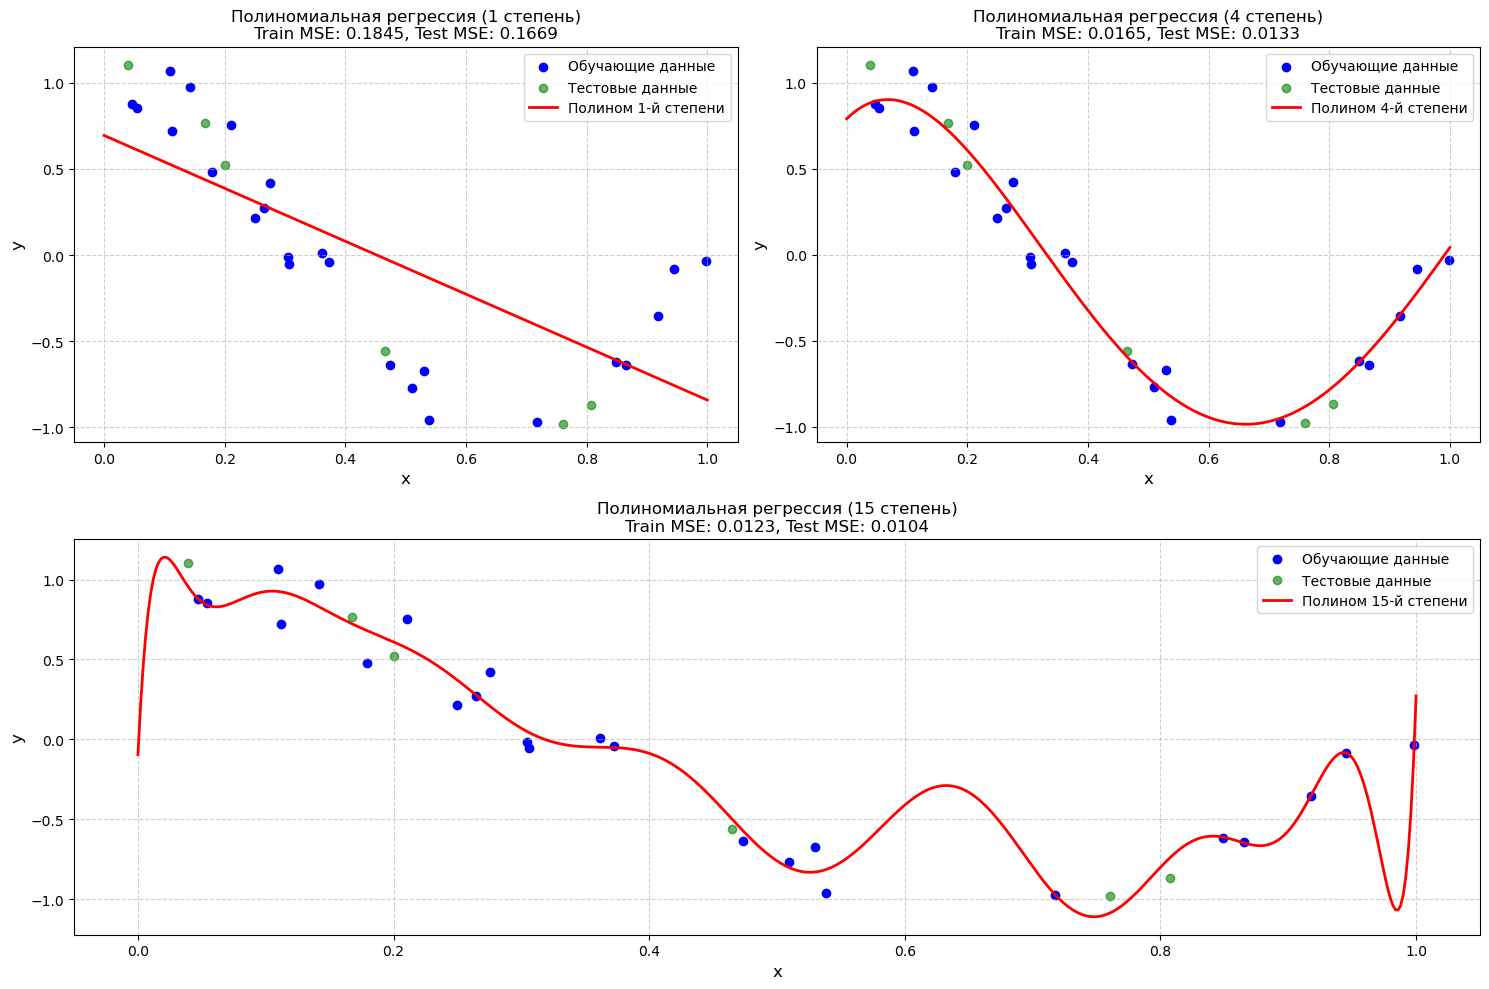

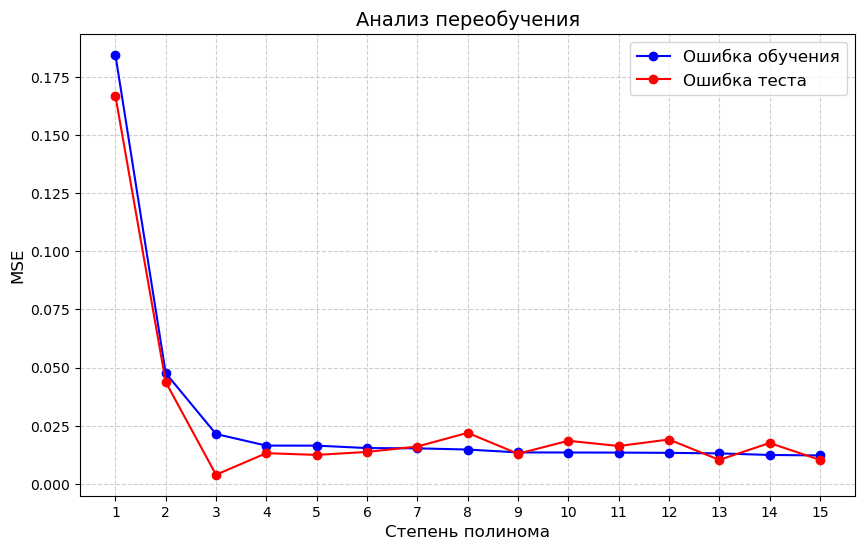

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec

# Генерация данных
np.random.seed(15)
n = 30
x = np.random.uniform(0, 1, n).reshape(-1, 1)
y = np.cos((3/2) * np.pi * x) + np.random.normal(0, 0.1, size=(n, 1))

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

def plot_poly_model(degree, ax=None):
    """Визуализация полиномиальной регрессии с заданной степенью"""
    # Создаем pipeline: полиномиальные признаки + линейная регрессия
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    
    # Обучение модели
    model.fit(x_train, y_train)
    
    # Предсказания
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Метрики
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Получаем коэффициенты
    coef = model.named_steps['linearregression'].coef_.flatten().round(6)
    intercept = model.named_steps['linearregression'].intercept_.round(6)
    
    # Вывод информации
    print(f"\nМодель степени {degree}")
    print(f"Коэффициенты: {coef}")
    print(f"Свободный член: {intercept}")
    print(f"Train MSE: {train_mse:.6f}, Test MSE: {test_mse:.6f}")
    print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    
    # Визуализация
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    x_plot = np.linspace(0, 1, 500).reshape(-1, 1)
    y_plot = model.predict(x_plot)
    
    ax.scatter(x_train, y_train, color='blue', label='Обучающие данные')
    ax.scatter(x_test, y_test, color='green', label='Тестовые данные', alpha=0.6)
    ax.plot(x_plot, y_plot, color='red', linewidth=2, 
            label=f'Полином {degree}-й степени')
    
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)
    ax.legend(fontsize=10)
    ax.set_title(f'Полиномиальная регрессия ({degree} степень)\n'
                f'Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}', 
                fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    return ax

# Создаем комплексную визуализацию
plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=plt.gcf())

degrees = [1, 4, 15]
axes = [
    plt.subplot(gs[0, 0]),
    plt.subplot(gs[0, 1]),
    plt.subplot(gs[1, :])
]

for degree, ax in zip(degrees, axes):
    plot_poly_model(degree, ax)

plt.tight_layout()
plt.show()

# Анализ переобучения
degrees = range(1, 16)
train_errors = []
test_errors = []

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    model.fit(x_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(x_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(x_test)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'b-o', label='Ошибка обучения')
plt.plot(degrees, test_errors, 'r-o', label='Ошибка теста')
plt.xlabel('Степень полинома', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Анализ переобучения', fontsize=14)
plt.xticks(degrees)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Вывод: Наилучшие результаты показывает полиномиальная модель 4-й степени, которая обеспечивает оптимальный баланс между точностью аппроксимации и устойчивостью модели. В то время как линейная модель оказывается слишком простой, а модель 15-й степени - избыточно сложной, 4-я степень полинома позволяет достичь высокой точности без риска переобучения.